# Scatter Plot

In [1]:
# %pip install plotly
# %pip install numpy
# %pip install pandas
# %pip install ipykernel
# %pip install --upgrade nbformat
# %pip install requests
# %pip install lxml
# %pip install html5lib
# %pip install beautifulsoup4
# %pip install yfinance
#%pip install matplotlib

In [2]:
# Import packages
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import requests

In [3]:
# Array creation
x = np.arange(0,50,2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48])

In [4]:
# first graph
# X axis -> X; y axis -> X square

# Declare figure
fig = go.Figure()
#Add argument (Trace, titles, update axis .....)
fig.add_trace(go.Scatter(x=x, y=x**2))
# Show graph
fig.show()

In [5]:
# first graph
# X axis -> X; y axis -> X square

# Declare figure
fig = go.Figure()
# Add argument (Trace, titles, update axis .....)
fig.add_trace(go.Scatter(x=x, y=x**2, mode='markers'))
# Show graph
fig.show()

# Recap markers

In [6]:
N = 100
random_x = np.linspace(0,1,N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5


# Declare figure
fig = go.Figure()
# Add argument (Trace, titles, update axis .....)
fig.add_trace(go.Scatter(x=random_x, y=random_y0, mode="lines", name="lines"))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,mode="lines+markers",name="lines+markers"))
fig.add_trace(
    go.Scatter(x=random_x, y=random_y2, mode="markers", name="markers")
)

# Show graph
fig.show()

# Market Data

In [7]:
import yfinance as yf

# Fetch historical data
# 'period' can be 1mo, 6mo, 1y, max, etc.
# aapl_data = yf.download("AAPL", period="5y")
# aapl_data.to_csv("apple_data.csv")

In [8]:
apple_data = pd.read_csv('apple_data.csv')

In [9]:
apple_data.head(5)

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,125.97445678710938,130.06295318684514,123.39480688941487,129.97534605093776,143301900
3,2021-01-05,127.53199768066406,128.24262865019975,125.02048862539876,125.46828327943898,97664900
4,2021-01-06,123.23905944824219,127.57092663069263,123.02489875437408,124.32932869572905,155088000


In [10]:
# 1. Load the CSV, skipping the problematic header rows
# We need to skip row 1 (ticker labels) and row 2 (the extra date label)
apple_data = pd.read_csv("apple_data.csv", skiprows=[1,2])
# 2. Rename the first column to 'Date'
apple_data.rename(columns={apple_data.columns[0]: "Date"}, inplace=True)

In [11]:
apple_data.set_index('Date', inplace=True)

In [12]:
print(apple_data.head())

                 Close        High         Low        Open     Volume
Date                                                                 
2021-01-04  125.974457  130.062953  123.394807  129.975346  143301900
2021-01-05  127.531998  128.242629  125.020489  125.468283   97664900
2021-01-06  123.239059  127.570927  123.024899  124.329329  155088000
2021-01-07  127.444359  128.135516  124.465598  124.952324  109578200
2021-01-08  128.544403  129.109007  126.772712  128.914305  105158200


# To do it the preventative way
* Pre processing of saving the file

#

In [13]:
# import yfinance as yf

# # Download data
# aapl_data = yf.download("AAPL", period="1mo")

# # "Flatten" the multi-index if it exists
# if isinstance(aapl_data.columns, pd.MultiIndex):
#     aapl_data.columns = aapl_data.columns.get_level_values(0)

# # Now set_index is likely already done by yfinance,
# # but you can save it cleanly now:
# aapl_data.to_csv("AAPL_clean.csv")

In [14]:
x = apple_data.index
y = apple_data['Close']

In [15]:
# Plotting Apple Market Data
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers+lines", name="Apple Close"))
# Show graph
fig.show()

# Add more information to the chart

In [16]:
fig = go.Figure()
# Add Apple close price
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode="lines",
        name="AAPL Close",
        line=dict(color="#1f77b4", width=2),
        hovertemplate="<b>Date:</b> %{x}<br><b>Price:</b> $%{y:.2f}<extra></extra>",
    ))

fig.update_layout(
    title={
        'text': "Apple Inc. (AAPL) Historical Close Price",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor':'top',
        'font': dict(size=24)
    },
    template = 'plotly_white',
    hovermode='x unified',
    margin=dict(l=50, r=50, t=80, b=50)
)

# 3. Enhance Axes and Range Slider
fig.update_xaxes(
    rangeslider_visible=True,
    title="Date",
    rangeselector=dict(
        buttons=list(
            [
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all"),
            ]
        )
    ),
)

fig.update_yaxes(title="Stock Price (USD)", tickprefix="$", gridcolor="lightgrey")

fig.show()

In [17]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

In [18]:
import plotly.express as px

In [19]:
apple_data["Daily Return"] = apple_data["Close"].pct_change() * 100

In [20]:
# 2. Create the Histogram
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=apple_data["Daily Return"].dropna(),  # Drop the first NaN row
        nbinsx=20,  # Number of "buckets"
        marker_color="#330C73",
        opacity=0.75,
        name="Returns",
    )
)

# 3. Enhance the Layout
fig.update_layout(
    title="Distribution of AAPL Daily Returns",
    xaxis_title="Daily Return (%)",
    yaxis_title="Frequency (Number of Days)",
    template="plotly_white",
    bargap=0.1,  # Adds a small gap between bars
)

fig.show()

Why a Histogram is useful for Stocks:Volatility: If the bars are spread far apart, the stock is volatile (high risk).Skewness: If more bars are on the right side of zero, the stock had more positive days than negative days during this period.Center: The "peak" of your histogram shows the most common daily performance. For your current data, the mean daily return is approximately $-0.23\%$.

In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(x=apple_data.index, y=apple_data['Daily Return'], marker_color = 'red', hovertext="(Returns)| Daily"))
fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=apple_data.index,
        y=apple_data["Close"],
        marker_color="red",
        hovertext="(Returns)| Daily",
    )
)
fig.show()

# Financial Plots

In [23]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

In [24]:
apple_data

,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,
2021-01-04,125.974457,130.062953,123.394807,129.975346,143301900,NaN
2021-01-05,127.531998,128.242629,125.020489,125.468283,97664900,1.236394
2021-01-06,123.239059,127.570927,123.024899,124.329329,155088000,-3.366166
2021-01-07,127.444359,128.135516,124.465598,124.952324,109578200,3.412311
2021-01-08,128.544403,129.109007,126.772712,128.914305,105158200,0.863156
...,...,...,...,...,...,...
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800,-0.149740
2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200,0.131681
2025-12-30,273.079987,274.079987,272.279999,272.809998,22139600,-0.248401


# ScatterPlot

In [25]:
# Declare figure

fig = go.Figure()

# Add Trace
fig.add_trace(go.Scatter(x=apple_data.index,y=apple_data['Close']))

# Updated layout
fig.update_layout(
    title='Apple Daily Stock Price',
    yaxis_title="Apple Stock Price",
    xaxis_title="Date"
)
# Show chart

fig.show()

# Matplot lib chart

In [26]:
# Calculate moving averages
apple_data['ma_1'] = apple_data["Close"].rolling(window=1).mean()
apple_data["ma_2"] = apple_data["Low"].rolling(window=1).mean()
apple_data["ma_3"] = apple_data["High"].rolling(window=1).mean()
apple_data['ma_4'] =apple_data['Open'].rolling(window=1).mean()
apple_data['ma_5'] =apple_data['Close'].rolling(window=1).mean()
apple_data['ma_6'] =apple_data['Close'].rolling(window=1).mean()
apple_data['ma_7'] =apple_data['Close'].rolling(window=1).mean()
apple_data['ma_8'] =apple_data['Close'].rolling(window=1).mean()
apple_data['ma_9'] =apple_data['Close'].rolling(window=1).mean()

In [27]:
import matplotlib.pyplot as plt

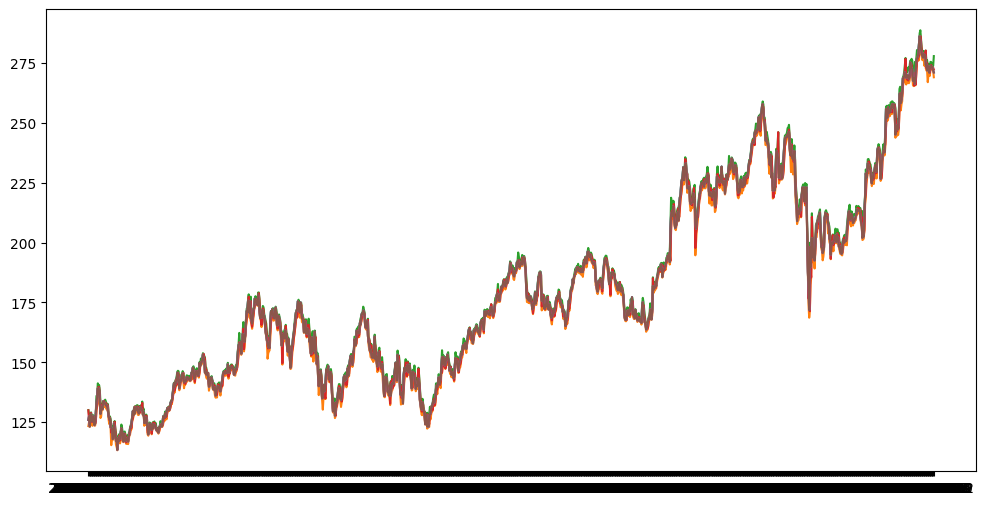

In [28]:
plt.figure(figsize=(12,6))
plt.plot(apple_data['ma_1'], label="ma1(close)")
plt.plot(apple_data["ma_2"], label="ma1(close)")
plt.plot(apple_data["ma_3"], label="ma1(close)")
plt.plot(apple_data["ma_4"], label="ma1(close)")
plt.plot(apple_data["ma_5"], label="ma1(close)")
plt.plot(apple_data["ma_6"], label="ma1(close)")

In [29]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# [Assuming 'apple_data' exists from previous steps]

# 1. Declare figure
fig = go.Figure()

# 2. Add Traces (Your specific colors)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_1"],
        name="MA 1 (Black)",
        line=dict(color="black", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_2"],
        name="MA 2 (Red)",
        line=dict(color="#d62728", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_3"],
        name="MA 3 (Gold)",
        line=dict(color="gold", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_4"],
        name="MA 4 (Green)",
        line=dict(color="#2ca02c", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_5"],
        name="MA 5 (Blue)",
        line=dict(color="#1f77b4", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=apple_data.index,
        y=apple_data["ma_6"],
        name="MA 6 (Orange)",
        line=dict(color="#ff7f0e", width=2),
    )
)

# 3. Enhanced Layout Configuration
fig.update_layout(
    title={
        "text": "Apple (AAPL) Daily Stock Price & Moving Averages",
        "y": 0.95,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(size=20),
    },
    template="plotly_white",
    hovermode="x unified",
    # FIX 1: Enable 'pan' or 'zoom' as default, and allow mousewheel
    dragmode="zoom",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
    margin=dict(t=100),
)

# 4. Enhance Axes
fig.update_yaxes(
    title="Price (USD)",
    tickprefix="$",
    showgrid=True,
    gridcolor="lightgrey",
    # FIX 2: Ensure Y-axis is not fixed (allows vertical dragging)
    fixedrange=False,
)

fig.update_xaxes(
    title="Date",
    # FIX 3: Disable Range Slider to allow proper "Box Zooming"
    # When this is True, Plotly forces the Y-axis to stay at global max/min
    rangeslider_visible=False,
    showgrid=True,
    gridcolor="lightgrey",
)

fig.show()